In [5]:
import sunpy.map
from astropy.io import fits

# Open the FITS file and patch the header if needed
with fits.open("vsl_dataset/VS1_T25_0914_002321_20250616_092605_LG_lev1_V2_1.fits") as hdul:
	hdr = hdul[0].header
	# Patch the unit string if present
	for key in hdr:
		if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
			hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')
	# Force CUNIT1 to 'arcsec' to satisfy SunPy Map requirements
	hdr['CUNIT1'] = 'arcsec'
	# Create the SunPy map from the patched HDU
	observer = sunpy.map.Map(hdul[0].data, hdr)
observer

TypeError: The value must be a valid Python or Numpy numeric type.

TypeError: The value must be a valid Python or Numpy numeric type.

For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


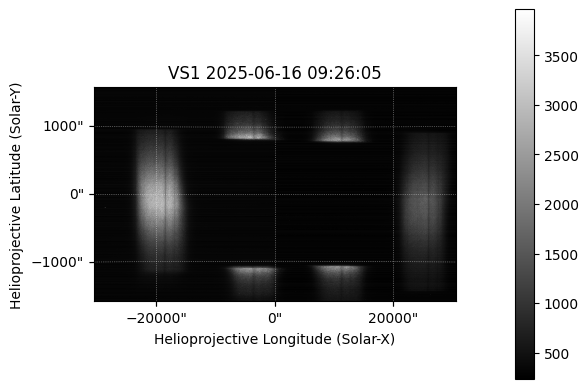

In [6]:
import sunpy.map
from astropy.io import fits
import numpy as np

fits_path = "vsl_dataset/VS1_T25_0914_002321_20250616_092605_LG_lev1_V2_1.fits"

with fits.open(fits_path) as hdul:
    hdr = hdul[0].header

    # --- 1. Fix unit string issues ---
    for key in hdr:
        if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
            hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')

    # --- 2. Ensure coordinate units are valid ---
    hdr['CUNIT1'] = 'arcsec'
    hdr['CUNIT2'] = 'arcsec'

    # --- 3. Fix numeric fields that might be stored as strings ---
    for key in ['CDELT1', 'CDELT2', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2']:
        if key in hdr:
            try:
                hdr[key] = float(hdr[key])  # convert string → float
            except Exception:
                hdr[key] = 0.0  # if it's totally invalid, set a default

    # --- 4. Replace NaNs or invalid data values in the image ---
    data = hdul[0].data
    if data is None:
        raise ValueError("FITS file does not contain image data in [0].")

    data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)

    # --- 5. Create the SunPy map safely ---
    observer = sunpy.map.Map(data, hdr)

observer.peek(draw_grid=True)
